In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
%matplotlib inline

<AxesSubplot:>

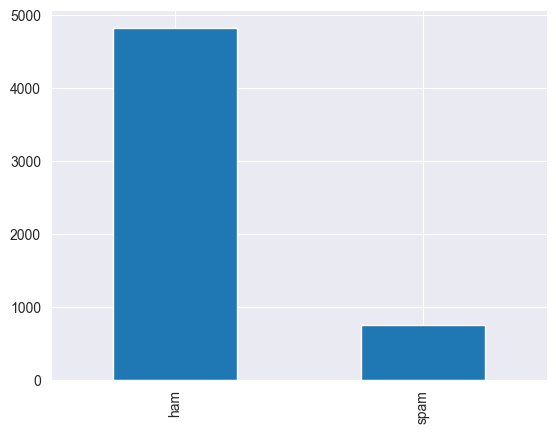

In [2]:
data = pd.read_csv("spam.csv", encoding="latin-1")
data.dropna(how="any", inplace=True, axis=1)
data.columns = ["label", "message"]
data.label.value_counts().plot.bar()

In [3]:
data["label_num"] = data.label.map({"ham": 0, "spam": 1})
data.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [4]:
data.groupby("label").describe()

label_num                                   
          count mean  std  min  25%  50%  75%  max
label                                             
ham      4825.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
spam      747.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0

Text(0.5, 0, 'Message Length')

<Figure size 1200x800 with 0 Axes>

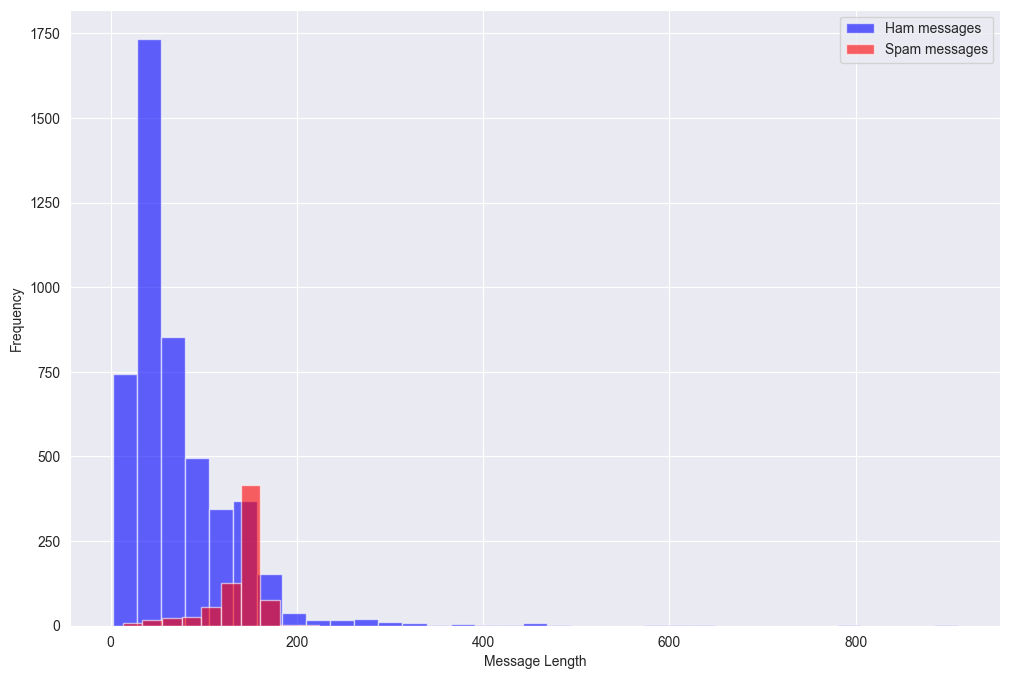

In [5]:
plt.figure(figsize=(12, 8))
data["message_len"] = data.message.apply(len)
plt.figure(figsize=(12, 8))
data[data.label=="ham"].message_len.plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.6)
data[data.label=='spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)
plt.legend()
plt.xlabel("Message Length")

In [6]:
data_spam = data[data["label"] == "spam"].copy()
data_spam.head()

,label,message,label_num,message_len
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1,148
8,spam,WINNER!! As a valued network customer you have...,1,158
9,spam,Had your mobile 11 months or more? U R entitle...,1,154
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",1,136


In [7]:
def show_wordcloud(data_spam_or_ham, title):
    text = "".join(data_spam_or_ham["message"].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords, background_color="lightgrey", colormap="viridis", width=800, height=600).generate(text)
    plt.figure(figsize=(10,7), frameon=True)
    plt.imshow(fig_wordcloud)
    plt.axis("off")
    plt.title(title, fontsize=20)
    plt.show()

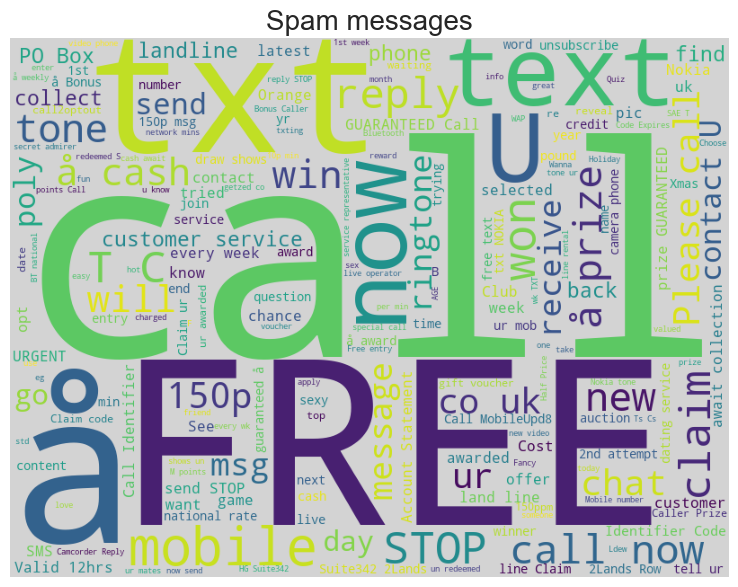

In [8]:
show_wordcloud(data_spam, "Spam messages")